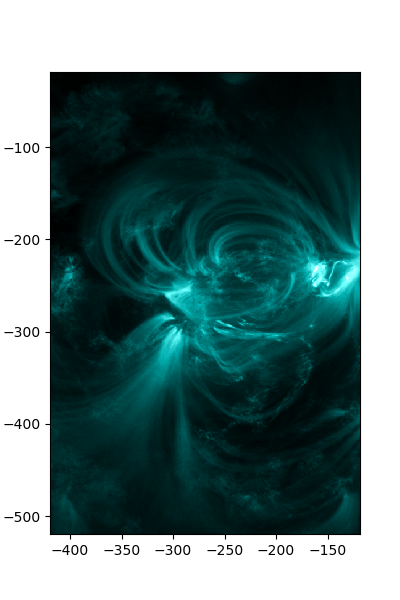

In [15]:
from InteractiveLoopTracer import *
from WideLoop import *
import numpy as np
from TDPlotter import *
from sites import *
import matplotlib.pyplot as plt

%matplotlib widget

lines = [94, 131, 171, 193, 211, 304, 335]
images = os.listdir('../sunishot/images')

tmp = [sunpy.map.Map(f'../sunishot/images/{filename}') for filename in images if filename.find(f'{lines[2]}A') != -1]
aia_map = sunpy.map.Map(tmp, sequence=True)
x_grid = np.linspace(aia_map[0].bottom_left_coord.Tx.value, aia_map[0].top_right_coord.Tx.value, aia_map[0].data.shape[1])
y_grid = np.linspace(aia_map[0].bottom_left_coord.Ty.value, aia_map[0].top_right_coord.Ty.value, aia_map[0].data.shape[0])

tracer = WideLoop(aia_map.data[:,:,50], x_grid, y_grid)
tracer.show()

In [8]:
xin, yin = np.loadtxt('test_points.csv', delimiter=',').T
test_data = TDPlotter('../sunishot/images')

In [9]:
test_data.get_data(xin, yin, 11)

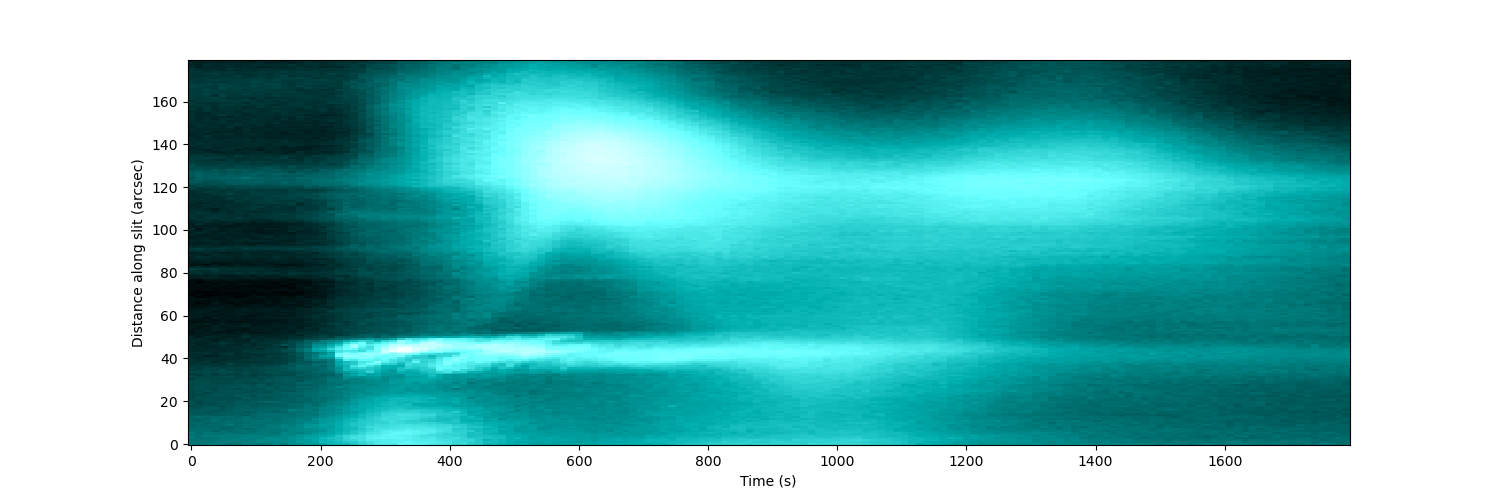

In [10]:
test_data.plot_td(131)

In [6]:
test_data.save_npz('res20131228')
test_data.save_txt('res20131228')

In [12]:
lines

[94, 131, 171, 193, 211, 304, 335]

In [13]:
t_min = 0.07e6
t_max = 30e6
n_bins = 96
sites = SITES(t_min, t_max, n_bins, [str(l) for l in lines])

In [14]:
temp_plot = np.zeros((len(test_data.time_array), len(test_data.dist)))
conc_plot = np.zeros((len(test_data.time_array), len(test_data.dist)))
for i in range(len(test_data.time_array)):
    for j in range(len(test_data.dist)):    
        dems, err, dem_err = sites.calc_dem(np.array([test_data.intensity_stack[str(l)][i,j] for l in lines]), tol=0.01, max_iter=300)
        temp_plot[i,j] = sites.calc_temp(dems)
        conc_plot[i,j] = np.sqrt(sites.calc_em(dems)/72527094)
        print(f'Point {j} at time {test_data.time_array[i]} done!')

Point 0 at time 0.0 done!
Point 1 at time 0.0 done!
Point 2 at time 0.0 done!
Point 3 at time 0.0 done!
Point 4 at time 0.0 done!
Point 5 at time 0.0 done!
Point 6 at time 0.0 done!
Point 7 at time 0.0 done!
Point 8 at time 0.0 done!
Point 9 at time 0.0 done!
Point 10 at time 0.0 done!
Point 11 at time 0.0 done!
Point 12 at time 0.0 done!
Point 13 at time 0.0 done!
Point 14 at time 0.0 done!
Point 15 at time 0.0 done!
Point 16 at time 0.0 done!
Point 17 at time 0.0 done!
Point 18 at time 0.0 done!
Point 19 at time 0.0 done!
Point 20 at time 0.0 done!
Point 21 at time 0.0 done!
Point 22 at time 0.0 done!
Point 23 at time 0.0 done!
Point 24 at time 0.0 done!
Point 25 at time 0.0 done!
Point 26 at time 0.0 done!
Point 27 at time 0.0 done!
Point 28 at time 0.0 done!
Point 29 at time 0.0 done!
Point 30 at time 0.0 done!
Point 31 at time 0.0 done!
Point 32 at time 0.0 done!
Point 33 at time 0.0 done!
Point 34 at time 0.0 done!
Point 35 at time 0.0 done!
Point 36 at time 0.0 done!
Point 37 at

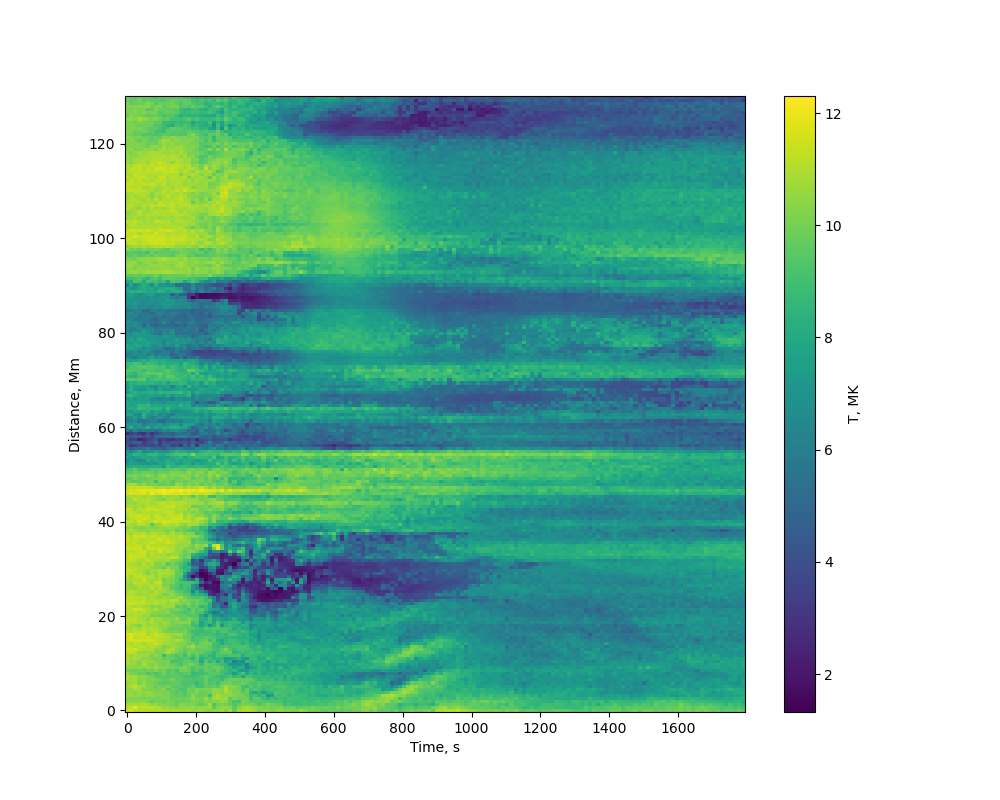

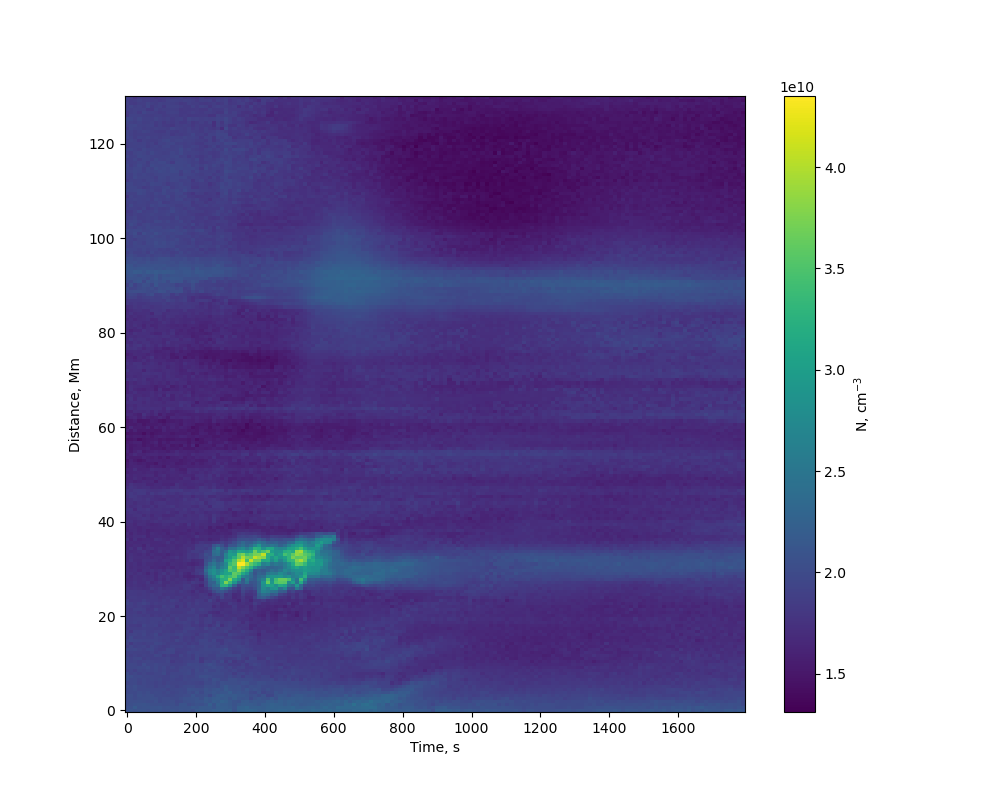

In [19]:
fig1, ax1 = plt.subplots(figsize=(10,8))
im1 = ax1.pcolormesh(test_data.time_array, test_data.dist*0.72527094, temp_plot.T/1e6)
ax1.set_xlabel('Time, s')
ax1.set_ylabel('Distance, Mm')
fig1.colorbar(im1, ax=ax1, label='T, MK')
plt.show()

fig2, ax2 = plt.subplots(figsize=(10,8))
im2 = ax2.pcolormesh(test_data.time_array, test_data.dist*0.72527094, conc_plot.T)
ax2.set_xlabel('Time, s')
ax2.set_ylabel('Distance, Mm')
fig2.colorbar(im2, ax=ax2, label='N, cm$^{-3}$')
plt.show()

In [20]:
tems = {'dist': test_data.dist, 'time': test_data.time_array, 'T': temp_plot, 'n': conc_plot}
np.savez('res_20131228_tems_conc.npz', **tems)
np.savetxt('res20131228_temp.txt', temp_plot)
np.savetxt('res20131228_n.txt', conc_plot)